In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('../dataS/monthly_dataset.csv')

data.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%b')
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [4]:
df = pd.DataFrame(data['Peak Load (MW)'].values, index=data.index, columns=['Peak Load (MW)'])

df.head()

,Peak Load (MW)
Date,
2002-01-01,14552.5
2002-02-01,15260.8
2002-03-01,16485.3
2002-04-01,16681.1
2002-05-01,16293.1


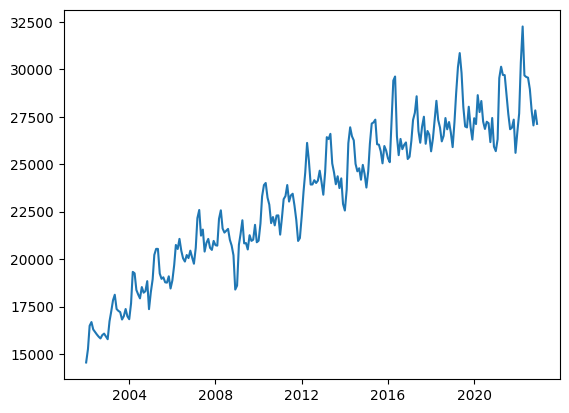

In [5]:
plt.plot(df)
plt.show()

In [6]:
train_data = df.iloc[:180, :]
test_data = df.iloc[180:, :]

In [7]:
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()
predictions = results.predict(start=180, end=251, dynamic=False)

c:\Users\MARC\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\MARC\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [8]:
final_model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
final_results = final_model.fit()
forecast = final_results.forecast(steps=120)
print(forecast)

c:\Users\MARC\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\MARC\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-01-01    27308.835782
2023-02-01    28056.154178
2023-03-01    30013.446411
2023-04-01    30872.930475
2023-05-01    30407.355685
                  ...     
2032-08-01    32898.727565
2032-09-01    32610.994742
2032-10-01    32241.010709
2032-11-01    32681.123274
2032-12-01    31796.894785
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64


In [9]:
forecast = forecast.to_frame()

forecast.columns = ['Peak Forecast']

In [10]:
forecast.head()

,Peak Forecast
2023-01-01,27308.835782
2023-02-01,28056.154178
2023-03-01,30013.446411
2023-04-01,30872.930475
2023-05-01,30407.355685


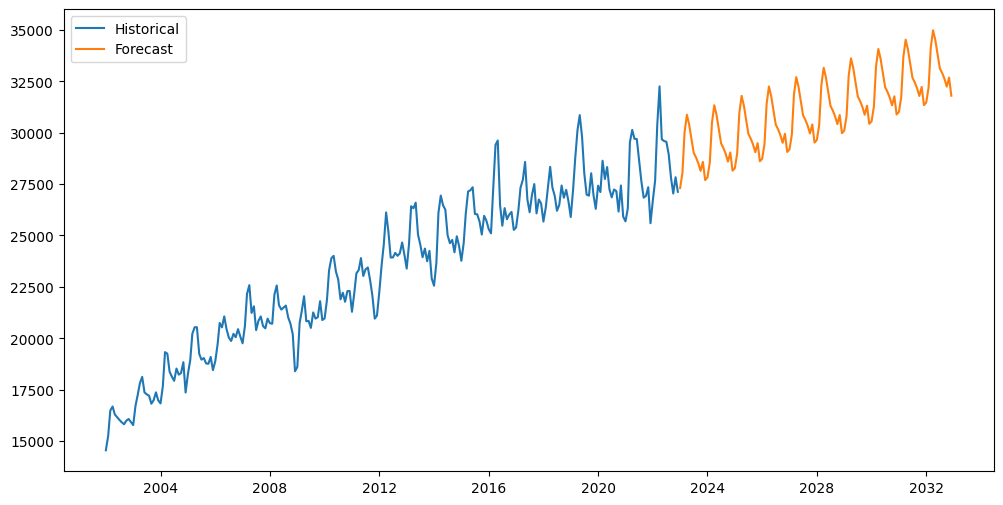

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()